/var/folders/80/dpnwd7h93_s2rmdn2t1q5n0m0000gn/T/ipykernel_2013/2099536396.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleaned_for_predictive_modeling.csv", parse_dates=["Date"])


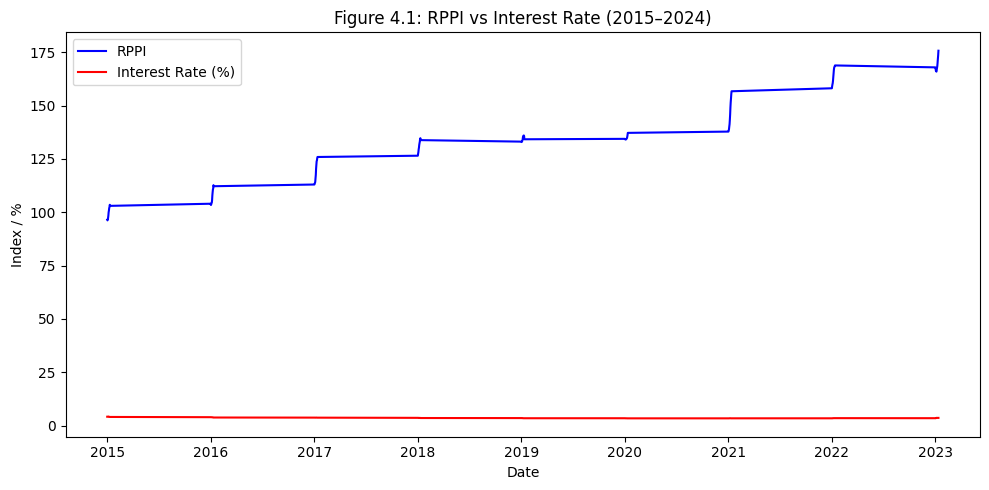

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned data
df = pd.read_csv("cleaned_for_predictive_modeling.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Plot RPPI vs Interest Rate
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["RPPI"], label="RPPI", color="blue")
plt.plot(df.index, df["InterestRate"], label="Interest Rate (%)", color="red")
plt.title("Figure 4.1: RPPI vs Interest Rate (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Index / %")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


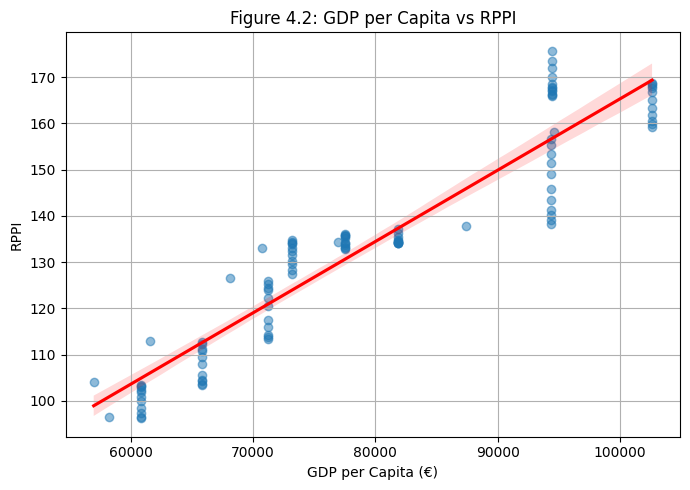

In [3]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(7, 5))
sns.regplot(x="GDP", y="RPPI", data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title("Figure 4.2: GDP per Capita vs RPPI")
plt.xlabel("GDP per Capita (€)")
plt.ylabel("RPPI")
plt.grid(True)
plt.tight_layout()
plt.show()


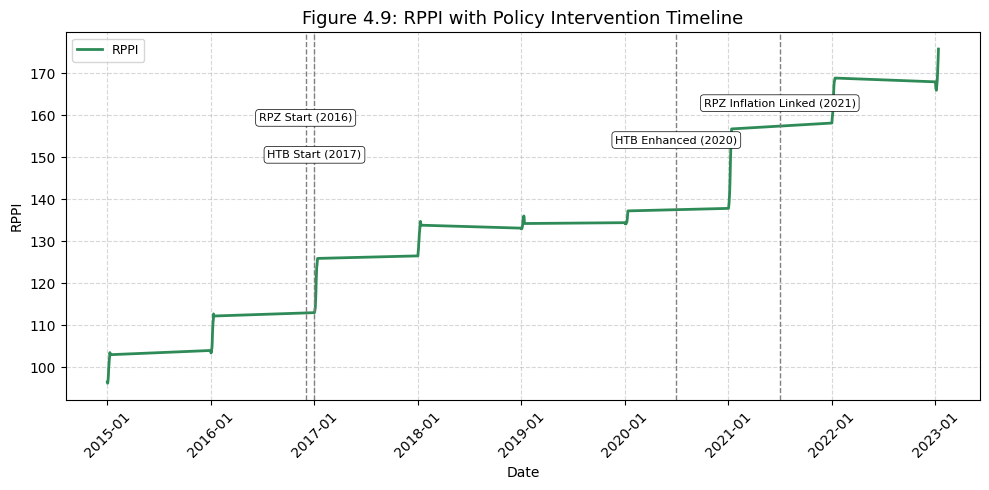

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Define policy events and Y-positions for staggering
policy_events = {
    "HTB Start (2017)": ("2017-01-01", 0.85),
    "RPZ Start (2016)": ("2016-12-01", 0.90),
    "HTB Enhanced (2020)": ("2020-07-01", 0.87),
    "RPZ Inflation Linked (2021)": ("2021-07-01", 0.92)
}

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["RPPI"], label="RPPI", color="seagreen", linewidth=2)

rppi_max = df["RPPI"].max()

for label, (date_str, height_frac) in policy_events.items():
    date = pd.to_datetime(date_str)
    y_pos = rppi_max * height_frac
    
    plt.axvline(date, color="gray", linestyle="--", linewidth=1)
    plt.annotate(
        label,
        xy=(date, y_pos),
        xytext=(0, 0),
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=0,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
    )

plt.title("Figure 4.9: RPPI with Policy Intervention Timeline", fontsize=13)
plt.xlabel("Date")
plt.ylabel("RPPI")
plt.xticks(rotation=45)
plt.legend(loc="upper left", fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()
plt.savefig("Figure_4_9_RPPI_Policy_Final.png", dpi=300)
plt.show()


KeyError: 'Final_Predicted_RPPI'

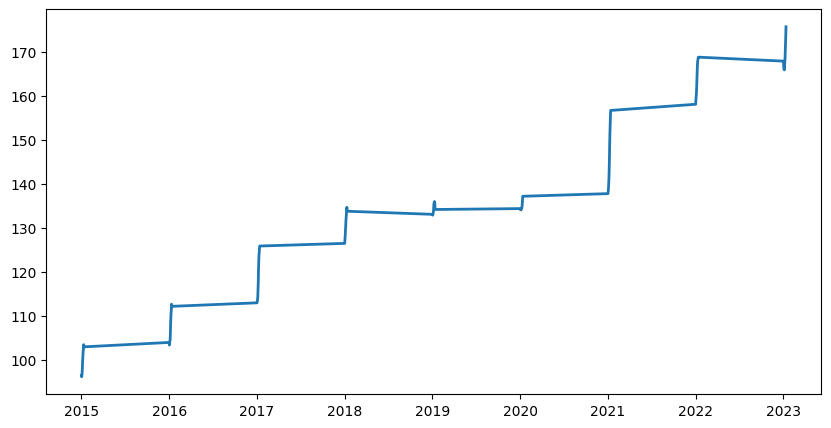

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["RPPI"], label="Actual RPPI", linewidth=2)
plt.plot(df.index, df["Final_Predicted_RPPI"], label="Final Predicted RPPI", linestyle="--")
plt.title("Figure 4.5: Actual vs Predicted RPPI (Final Model)")
plt.xlabel("Date")
plt.ylabel("RPPI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
